<h1 style="text-align:center; font-size:40px;">DIGIT RECOGNITION USING CNN</h1>

<p style="font-size:22px;"> In this notebook we are going to recognize digit using cnn.</p>

<p style="font-size:22px;"> Dataset Overview:</p>

<p style="font-size:15px;">
    The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.</p>

<p style="font-size:15px;">Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.</p>

<p style="font-size:15px;">The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.</p>

<p style="font-size:15px;">Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero). </p>


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers,models

# Loading Dataset

In [2]:
train=pd.read_csv('../input/digit-recognizer/train.csv')
test=pd.read_csv('../input/digit-recognizer/test.csv')


# Exploring Data

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Looking Shape of both traing and test data

In [6]:
print('Shape of train data {} and shape of test data {}'.format(train.shape,test.shape))

Shape of train data (42000, 785) and shape of test data (28000, 784)


#  Looking for Null values

In [7]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [8]:
test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

# Plotting Digits

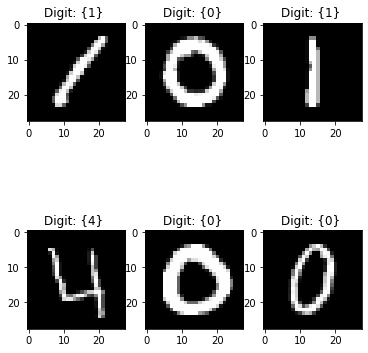

In [9]:
fig,ax = plt.subplots(2,3,figsize=(6,7))
ax = ax.flatten()
for i in range(6):
    ax[i].imshow(train.iloc[i,1:].to_numpy().reshape(28,28),cmap='gray')
    ax[i].set_title('Digit: {} '.format({train.iloc[i,0]}))

# Visualizing total count for each digit

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


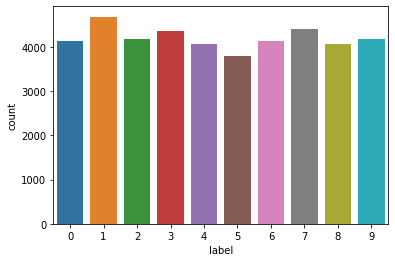

In [10]:
sns.countplot('label',data=train)
plt.show()

In [11]:
X=train.drop('label',axis=1)
y=train['label']

**Saving Index of each image**

> This is for submission purpose.



In [12]:
imageid=(test.index)+1
imageid

RangeIndex(start=1, stop=28001, step=1)

# Scaling Data
<p style="font-size:16px;">As we know number for pixel varies from 0-255 so we are diving every entry with 255 so that data should be scaled. We are doing this as gradient descent converge faster on scaled data. </p>

In [13]:
x_Scale=X/255
test_scale=test/255

# Splitting into train and validation set
<p style="font-size:16px;"> We are going to split our data into train and validation sets. The ratio for split I took is 0.3. It can vary like you can try doing it on 0.25,0.2 etc.</p>

In [14]:
xtrain,xval,ytrain,yval=train_test_split(x_Scale,y,test_size=0.3)

In [15]:
ytrain.shape

(29400,)

In [16]:
xtrain.shape

(29400, 784)

# Reshaping Data

In [17]:
x_train = xtrain.values.reshape(-1,28,28,1)
x_test = xval.values.reshape(-1,28,28,1)
test_scale=test_scale.values.reshape(-1,28,28,1)

# CNN MODEL
<p style="font-size:18px;">I am going to use cnn model with 3 convolutional layers followed by pooling layer.
    Using pooling inorder to reduce the complexity or dimension which helps us doing less computation. Here is the structure.
  </p>

<p style="font-size:22px;">Image -> Conv+ReLu -> Pooling -> Conv+ReLu -> Pooling -> Deep Neural Netwrok</p>

<p style="font-size:18px;">In deep neural network I am going to use 3 dense layers with ReLu activation function and last layer as softmax. I will also be using dropout layers which helps in reducing problem of overfitting.
  </p>

In [30]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn.fit(x_train,ytrain,epochs=30)

Epoch 1/30
919/919 [==============================] - 8s 8ms/step - loss: 0.5092 - accuracy: 0.8373
Epoch 2/30
919/919 [==============================] - 7s 8ms/step - loss: 0.1776 - accuracy: 0.9489
Epoch 3/30
919/919 [==============================] - 7s 8ms/step - loss: 0.1229 - accuracy: 0.9641
Epoch 4/30
919/919 [==============================] - 7s 8ms/step - loss: 0.0951 - accuracy: 0.9728
Epoch 5/30
919/919 [==============================] - 7s 8ms/step - loss: 0.0807 - accuracy: 0.9772
Epoch 6/30
919/919 [==============================] - 7s 7ms/step - loss: 0.0697 - accuracy: 0.9798
Epoch 7/30
919/919 [==============================] - 7s 8ms/step - loss: 0.0610 - accuracy: 0.9829
Epoch 8/30
919/919 [==============================] - 7s 8ms/step - loss: 0.0566 - accuracy: 0.9840
Epoch 9/30
919/919 [==============================] - 7s 8ms/step - loss: 0.0492 - accuracy: 0.9856
Epoch 10/30
919/919 [==============================] - 7s 7ms/step - loss: 0.0461 - accuracy: 0.9867

# Evaluating Model

In [32]:
cnn.evaluate(x_test,yval)

394/394 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9889


[0.061808355152606964, 0.9888888597488403]

# Predicting

In [33]:
ypred=cnn.predict(test_scale)

# Getting class from the prediction

In [34]:
yclass=[np.argmax(i) for i in ypred]


# **Making csv file for submission**

In [35]:
df=pd.DataFrame({'ImageId':imageid,'Label':yclass})
df.to_csv('subfile.csv',index=False)
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
